#### PREPARE
modules import, clean data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
df = pd.read_csv('../boston_clean.csv')

##### CHANGING TYPE OF COLUMNS THAT USING TIME AS VALUES

In [5]:
time_columns = ['Pace', '5K', '10K', '15K', '20K', '25K', '30K', '35K', '40K', 'Official Time']
df[time_columns] = df[time_columns].apply(lambda col: pd.to_timedelta(col, errors='coerce'))

# BIVARIATE

## Age x Official time

In [8]:
df_age_officialtime = df.copy()[['Age', 'Official Time']]

In [9]:
age_officialtime = df_age_officialtime.groupby(by='Age')['Official Time'].agg(
    min_officialtime='min',
    max_officialtime='max',
    mean_officialtime='mean',
    median_officialtime='median')
age_officialtime

,min_officialtime,max_officialtime,mean_officialtime,median_officialtime
Age,,,,
18,0 days 02:46:59,0 days 06:03:14,0 days 04:15:25.387096774,0 days 04:15:45.500000
19,0 days 02:27:11,0 days 07:04:33,0 days 04:00:38.583941605,0 days 03:48:49
20,0 days 02:22:21,0 days 06:01:34,0 days 03:51:15.193181818,0 days 03:44:17
21,0 days 02:12:45,0 days 06:01:29,0 days 03:53:03.292433537,0 days 03:43:28
22,0 days 02:27:16,0 days 06:01:31,0 days 03:54:20.863052781,0 days 03:46:20
...,...,...,...,...
80,0 days 04:14:10,0 days 05:59:54,0 days 04:56:46.583333333,0 days 04:45:02
81,0 days 04:26:49,0 days 06:08:10,0 days 05:12:45.600000,0 days 05:20:49
82,0 days 04:18:00,0 days 05:57:54,0 days 05:22:37.250000,0 days 05:37:17.500000


### visualization

In [11]:
df_age_officialtime['Official Time'] = df_age_officialtime['Official Time'].dt.total_seconds() / 3600

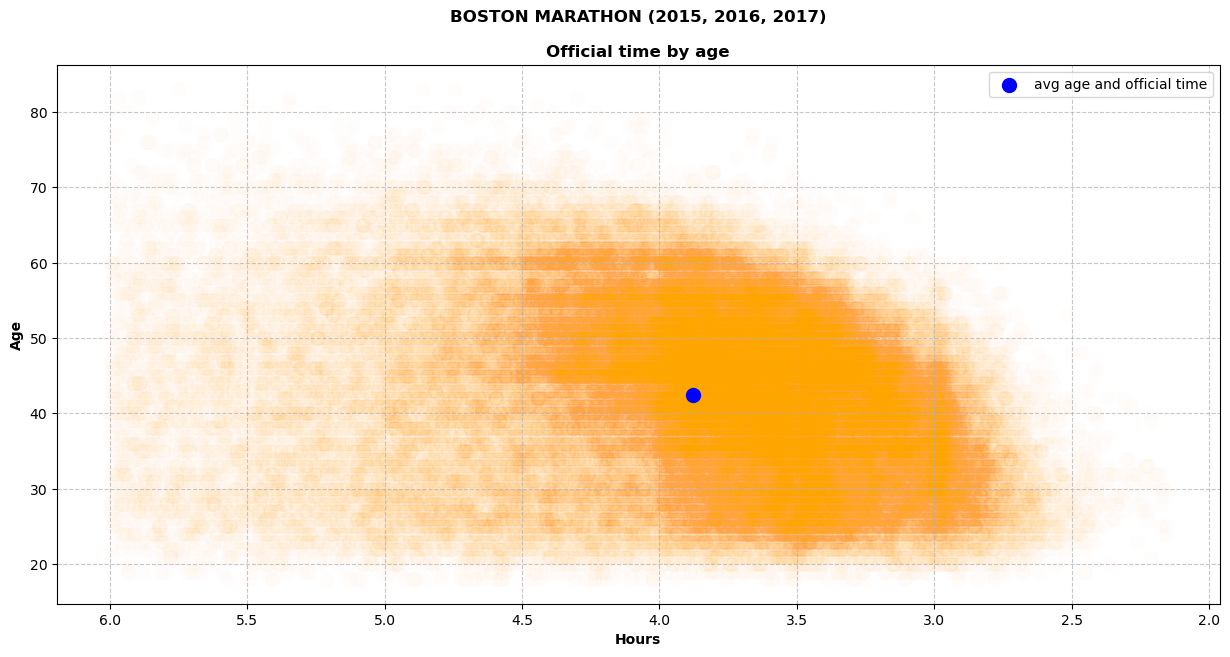

In [12]:
threshold = 6
df_age_officialtime = df_age_officialtime[df_age_officialtime['Official Time'] < threshold]

plt.figure(figsize=(15,7))
x = df_age_officialtime['Official Time']
y = df_age_officialtime['Age']
plt.scatter(x, y, color='orange', alpha=0.01, s=100)
plt.scatter(x.mean(), np.mean(y), s=100, color='b', label='avg age and official time')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(2,6.5,0.5))
plt.yticks(np.arange(20,81,10))
plt.gca().invert_xaxis()

plt.xlabel('Hours', fontweight='bold')
plt.ylabel('Age', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nOfficial time by age', fontweight='bold')

plt.savefig("../vexport/agexofficialtime.png", dpi=300, bbox_inches='tight')
plt.show()

In [13]:
for column in age_officialtime:
    age_officialtime[column] = age_officialtime[column].dt.total_seconds() / 3600

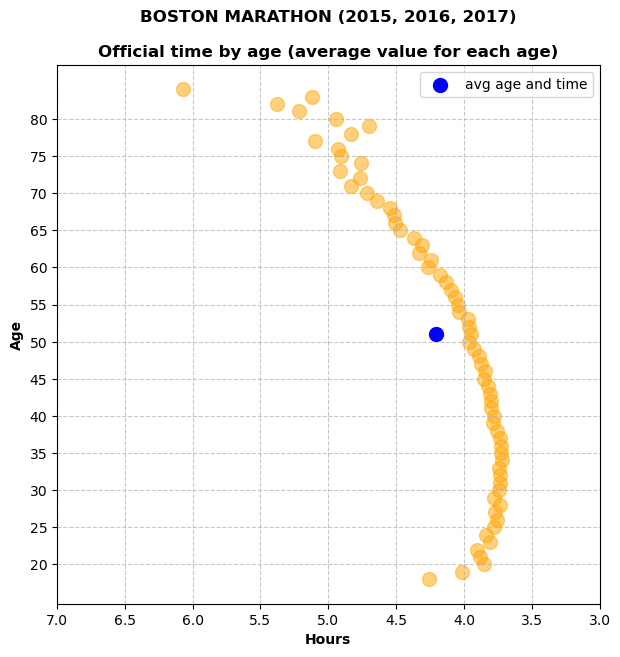

In [14]:
x = age_officialtime['mean_officialtime']
y = age_officialtime.index

plt.figure(figsize=(7,7))
plt.scatter(x, y, color='orange', s=100, alpha=0.5)
plt.scatter(x.mean(), np.mean(y), s=100, color='b', label='avg age and time')

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(np.arange(3,7.5,0.5))
plt.yticks(np.arange(20,81,5))
plt.gca().invert_xaxis()

plt.xlabel('Hours', fontweight='bold')
plt.ylabel('Age', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nOfficial time by age (average value for each age)', fontweight='bold')

plt.savefig("../vexport/agexofficialtime_avg.png", dpi=300, bbox_inches='tight')
plt.show()

#### export

In [16]:
age_officialtime.to_csv('../export/agexofficialtime.csv')